Importa o modelo a ser fatiado e mapeado

In [3]:
import matplotlib.pyplot as plt
import gui
import files
from timer import Timer
from components.layer import Layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
choice = gui.ask_load_or_begin()
if choice == "Novo Projeto":
    path_input, file_name = gui.load_model(folders)
    [dpi, layer_height] = gui.ask_parameters_input()
    with Timer("Fase 0: "):
        Layer.create_layers(folders, path_input, file_name, dpi, layer_height)
elif choice == "Carregar Salvo":
    gui.find_saved_file(folders)
elif choice == "Cancelar":
    quit

#TODO: encontrar uma forma de jogar layerHight para o slicing W/images (POSSIVELMENTE COM O RUNSINGLEMODEL)

Fase 0: 
criando as camadas
First arg: /home/matheus/Downloads/Tangran3/TangranV2/input/stl_models/cubo70.STL
Second arg: 300.0
Script executed from: /home/matheus/Downloads/Tangran3/TangranV2
Script executed from: /home/matheus/Downloads/Tangran3/TangranV2/input/sliced
Script executed from: /home/matheus/Downloads/Tangran3/TangranV2
Script executed from: /home/matheus/Downloads/Tangran3/TangranV2/slicing-with-images
number of degenerated triangles = 0
eps = 0.004
max thickness = 2
rounded plane spacing spacing = 2
model zmin = 0, model zmax = 20, first plane Z = -1.996, number of planes = 12
-Incremental, cubo70.STL, thickness = 2, #T = 176, #P = 10, #S = 880, 0.000575s (slicing), 0.001602s (polygon assembling), 0.006541s (total), *K: 5


rm: cannot remove '*.svg': No such file or directory
rm: cannot remove '*.png': No such file or directory




writing image: ../input/sliced/layer_000.pgm


writing image: ../input/sliced/layer_001.pgm


writing image: ../input/sliced/layer_002.pgm


writing image: ../input/sliced/layer_003.pgm


writing image: ../input/sliced/layer_004.pgm


writing image: ../input/sliced/layer_005.pgm


writing image: ../input/sliced/layer_006.pgm


writing image: ../input/sliced/layer_007.pgm


writing image: ../input/sliced/layer_008.pgm


writing image: ../input/sliced/layer_009.pgm


writing output file: out_3d.svg
... done


Total de [criando as camadas] : 2.1033337116241455
salvando as camadas
Total de [salvando as camadas] : 0.3738100528717041
Total de [Fase 0: ] : 2.4780805110931396


Paredes Finas

In [4]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 1: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_thin_walls(folders, nozzle_diam_external, nozzle_diam_internal)
        %reset_selective -f "c"
%reset_selective -f "camadas"
# TODO: arvore de paredes finas
# TODO: quando duas áreas se encontram
# TODO: limite de parede diam minimo
# TODO: anotar todos os (não fechou contorno)
# TODO arrumar para origens extremamente pequenas, ignorar da problema
# TODO arrumar casos onde a beirada esta vazndo criando areas triangulares distantes
# FIXME: Precisa mesmo separar linha 1 2 topo e baixo? muitos elementos estão sendo criados

Fase 1: Camada: 0
Criando paredes finas
Total de [Criando paredes finas] : 2.7259931564331055
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0005984306335449219
salvando imagens das regiões
ERRO: não deletou a coisa
Total de [salvando imagens das regiões] : 0.02505660057067871
Total de [Fase 1: Camada: 0] : 2.771052360534668
Fase 1: Camada: 1
Criando paredes finas
Total de [Criando paredes finas] : 2.3054943084716797
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.00026297569274902344
salvando imagens das regiões
ERRO: não deletou a coisa
Total de [salvando imagens das regiões] : 0.03218245506286621
Total de [Fase 1: Camada: 1] : 2.347353935241699
Fase 1: Camada: 2
Criando paredes finas
Total de [Criando paredes finas] : 2.371584892272949
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0008459091186523438
salvando imagens das regiões
ERRO: não deletou a coisa
Total de [salvando ima

Contornos

In [5]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[void_max,internal_max,external_max] = gui.ask_parameters_offsets()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 2: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_offsets(folders, void_max, external_max, internal_max)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 2: Camada: 0
Criando Lvls
Ilha: I_000 Número de Níveis: 4
Total de [Criando Lvls] : 1.229912519454956
Criando os loops
Total de [Criando os loops] : 0.839102029800415
Criando regiões de influência
Total de [Criando regiões de influência] : 0.061157941818237305
Criando as regiões de Offset
Total de [Criando as regiões de Offset] : 0.45664548873901367
Retirando regiões da camada
['Lvl_000', 0, 0] Perdendo total:1079 maior void:0.33877038895859474Bw -> aceito
['Lvl_001', 0, 0] Perdendo total:1872 maior void:0.5872020075282308Bw -> bloqueado
['Lvl_002', 0, 0] Perdendo total:1636 maior void:0.5131744040150564Bw -> bloqueado
['Lvl_000', 1, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_001', 1, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_002', 1, 0] Perdendo total:0Bw -> bloqueado por limite maximo
['Lvl_003', 0, 0] Perdendo total:15027 maior void:9.170639899623588Bw -> bloqueado
['Lvl_003', 0, 1] Perdendo total:15010 maior void:9.271016311166877Bw -> bloqueado
['Lvl_003', 0,

Pontes

In [6]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd
import numpy as np
from components import images_tools as it

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[n_max, nozzle_diam_internal] = gui.ask_parameters_bridges()
camadas = folders.load_layers_hdf5()
last_prohibited_areas = np.zeros(camadas[0].base_frame)
for i,c in enumerate(camadas):
    with Timer("Fase 3: Camada: " + str(i)):
        if i%2 == 1:
            last_image = it.rotate_img_cw(last_prohibited_areas )
        elif i%2 == 0:
            last_image = it.rotate_img_ccw(last_prohibited_areas )
        if i >= 2:
            if i%2 == 1:
                second_last_image = it.rotate_img_cw(camadas[i - 1].prohibited_areas)
            elif i%2 == 0:
                second_last_image = it.rotate_img_ccw(camadas[i - 1].prohibited_areas)
        else:
            second_last_image = np.zeros_like(last_image)
        c.prohibited_areas = last_image
        sum_prohibited_areas = it.sum_imgs([last_image, second_last_image])
        last_prohibited_areas = c.make_bridges(n_max, nozzle_diam_internal, folders, len(camadas), sum_prohibited_areas)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        # %reset_selective -f "c" 
# %reset_selective -f "camadas"

Fase 3: Camada: 0
Criando pontes de Offset
Total de [Criando pontes de Offset] : 0.7708187103271484
Criando pontes de Zigzag
Total de [Criando pontes de Zigzag] : 2.994237184524536
Criando pontes de Crossover
Total de [Criando pontes de Crossover] : 0.022414445877075195
Retirando pontes da Camada
Total de [Retirando pontes da Camada] : 0.012152671813964844
Gerando áreas proibidas
Total de [Gerando áreas proibidas] : 0.00048279762268066406
salvando imagens das regiões
ERRO: não deletou a coisa
Total de [salvando imagens das regiões] : 0.10407900810241699
Total de [Fase 3: Camada: 0] : 3.959104299545288
Fase 3: Camada: 1
Criando pontes de Offset
Total de [Criando pontes de Offset] : 0.699756383895874
Criando pontes de Zigzag
Total de [Criando pontes de Zigzag] : 3.3109543323516846
Criando pontes de Crossover
Total de [Criando pontes de Crossover] : 0.016008853912353516
Retirando pontes da Camada
Total de [Retirando pontes da Camada] : 0.020396709442138672
Gerando áreas proibidas
Total de

Zigzags

In [7]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        c.make_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"


Fase 4: Camada: 0
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 2.4473273754119873
salvando imagens das regiões
ERRO: não deletou a coisa
ERRO: não deletou a coisa
ERRO: não deletou a coisa
ERRO: não deletou a coisa
ERRO: não deletou a coisa
Total de [salvando imagens das regiões] : 0.036978721618652344
Total de [Fase 4: Camada: 0] : 2.532405376434326
Fase 4: Camada: 1
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 2.3882992267608643
salvando imagens das regiões
ERRO: não deletou a coisa
ERRO: não deletou a coisa
ERRO: não deletou a coisa
ERRO: não deletou a coisa
ERRO: não deletou a coisa
Total de [salvando imagens das regiões] : 0.03507566452026367
Total de [Fase 4: Camada: 1] : 2.4763681888580322
Fase 4: Camada: 2
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 2.3067712783813477
salvando imagens das regiões
ERRO: não deletou a coisa
ERRO: não deletou a coisa
ERRO: não deletou a coisa
ERRO: não deletou a c

Fase 4: Camada: 0


Total de [Fase 4: Camada: 0] : 0.3456416130065918
Fase 4: Camada: 1


Total de [Fase 4: Camada: 1] : 0.25053834915161133
Fase 4: Camada: 2


Total de [Fase 4: Camada: 2] : 0.3167243003845215
Fase 4: Camada: 3


Total de [Fase 4: Camada: 3] : 0.21025323867797852
Fase 4: Camada: 4


Total de [Fase 4: Camada: 4] : 0.2259531021118164
Fase 4: Camada: 5


Total de [Fase 4: Camada: 5] : 0.22327613830566406
Fase 4: Camada: 6


Total de [Fase 4: Camada: 6] : 0.21171116828918457
Fase 4: Camada: 7


Total de [Fase 4: Camada: 7] : 0.22207403182983398
Fase 4: Camada: 8


Total de [Fase 4: Camada: 8] : 0.21970391273498535
Fase 4: Camada: 9


Total de [Fase 4: Camada: 9] : 0.23024940490722656


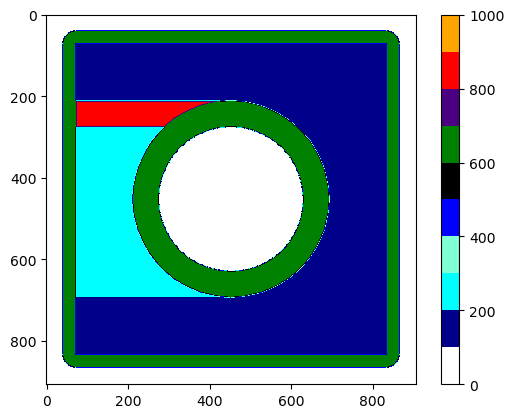

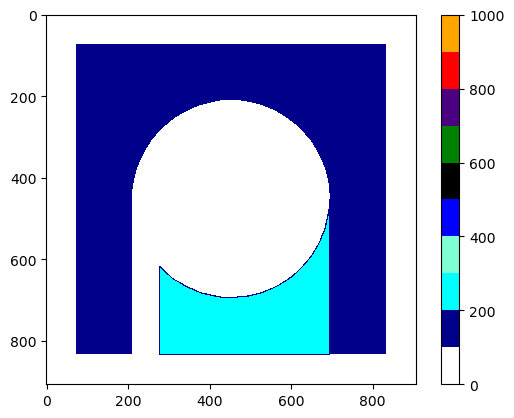

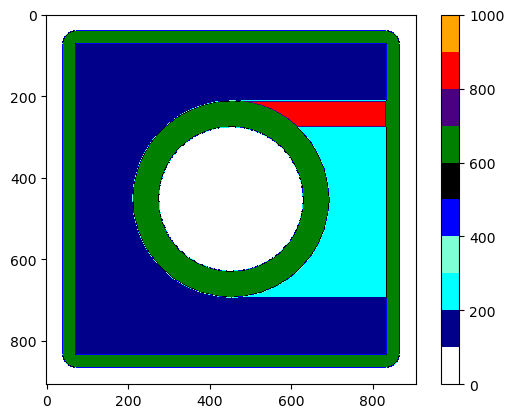

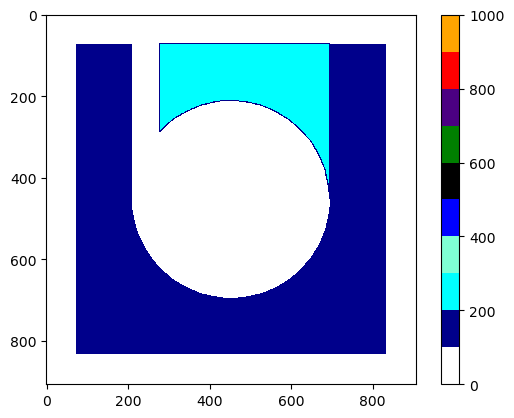

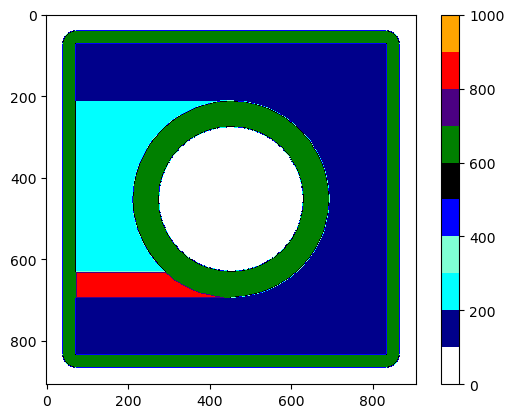

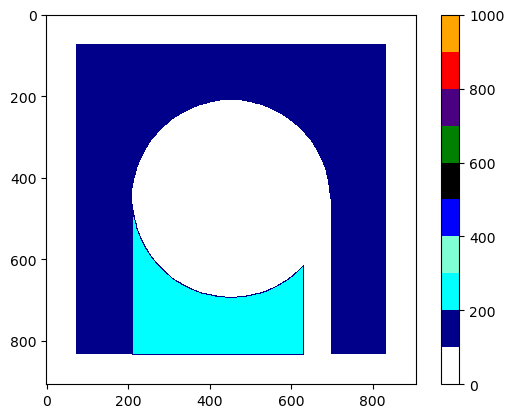

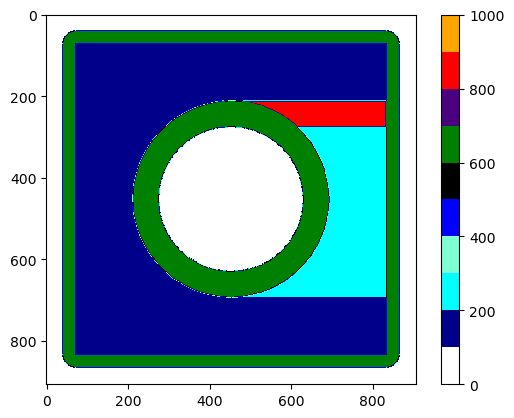

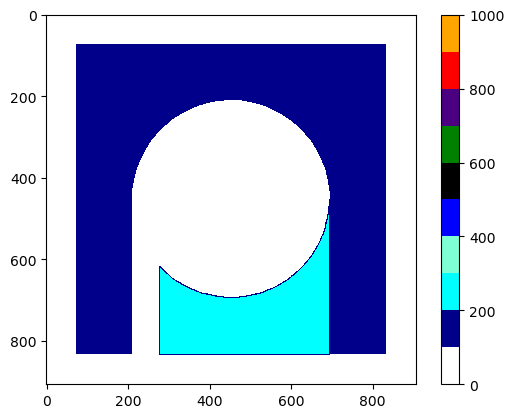

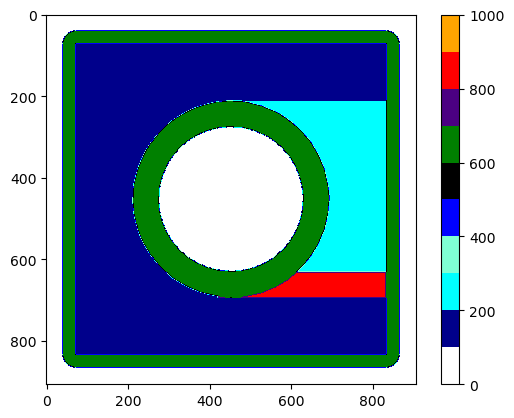

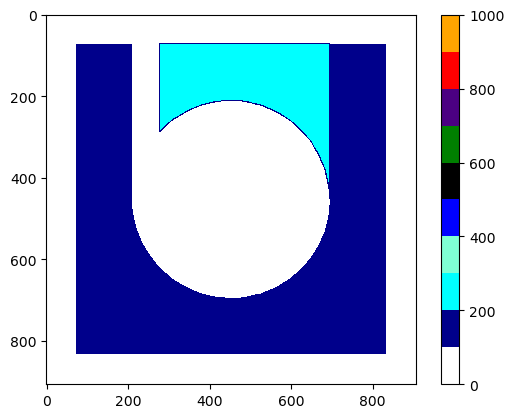

In [8]:
import gui
import files
from timer import Timer
from components import images_tools as it
from os import getcwd
import matplotlib.pyplot as plt
import matplotlib.colors
import os

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for c in camadas:
    folders.load_islands_hdf5(c)
tangran_cmap = matplotlib.colors.ListedColormap(["white","darkblue","aqua","aquamarine","blue","black","green","indigo","red","orange"])
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        plt.figure()
        img_mapping = it.final_mapping(c, folders)
        if i%2 == 1:
            img_mapping = it.rotate_img_ccw(img_mapping )
        plt.imshow(img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        # plt.imsave("aaa.png",img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.colorbar()
        print('\n')

ROTAS

Rotas de Offset

In [9]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

amendment_size = 0.7 #porcentagem do tamanho da poca de deposicao de material
for c in camadas:
    with Timer("Making offset routes"):
        c.make_offset_routes(amendment_size, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.11361026763916016
Total de [Making offset routes] : 2.1569788455963135
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.08091902732849121
Total de [Making offset routes] : 1.9008123874664307
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.08872056007385254
Total de [Making offset routes] : 2.457425355911255
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.09022402763366699
Total de [Making offset routes] : 2.139272451400757
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.09154367446899414
Total de [Making offset routes] : 2.1717426776885986
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.10056400299072266
Total de [Making offset routes] : 2.0740697383880615
Making offset routes
salvando imagen

Rotas de pontes

In [10]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Making bridges routes"):
        c.make_bridges_routes(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.04893898963928223
Total de [Making bridges routes] : 0.22841215133666992
Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.04333996772766113
Total de [Making bridges routes] : 0.2634127140045166
Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.045651912689208984
Total de [Making bridges routes] : 0.2636697292327881
Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.04463958740234375
Total de [Making bridges routes] : 0.2565343379974365
Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.045302391052246094
Total de [Making bridges routes] : 0.2613208293914795
Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.05613088607788086
Total de [Making bridges routes] : 0.26285743713378906
Making bridges rou

Rotas de Ziguezague

In [11]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Making zigzag routes"):
        c.make_zigzag_routes(folders)
        c.connect_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"



Making zigzag routes
criando as rotas de zigzag, camada:L_000
fazendo as tres opções:
Total de [fazendo as tres opções:] : 5.04178261756897
escolhendo entre elas:
Total de [escolhendo entre elas:] : 0.1817026138305664
fazendo as tres opções:
Total de [fazendo as tres opções:] : 4.176483392715454
escolhendo entre elas:
Total de [escolhendo entre elas:] : 0.17971539497375488
Total de [criando as rotas de zigzag, camada:L_000] : 10.372310161590576
salvando imagens das rotas
deletado: /L_000/I_000/zigzags
Total de [salvando imagens das rotas] : 0.08396339416503906
Criando os grafos de regiões
Total de [Criando os grafos de regiões] : 0.00970458984375
Conectando regiões de zigzag
Total de [Conectando regiões de zigzag] : 0.002953767776489258
salvando grafos
Total de [salvando grafos] : 0.1158294677734375
Total de [Making zigzag routes] : 10.873469114303589
Making zigzag routes
criando as rotas de zigzag, camada:L_001
fazendo as tres opções:
Total de [fazendo as tres opções:] : 5.06854557991

WEAVING

In [12]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
[iwflag] = gui.ask_parameters_weaving()
for c in camadas:
    with Timer("Fase 5 b"):
        c.internal_weaving(iwflag, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5 b
gerando preenchimentos oscilatórios
Pegando as falhas internas
Total de [Pegando as falhas internas] : 0.8746075630187988
Achando os contatos
Total de [Achando os contatos] : 3.5775601863861084
criando os weavings
Total de [criando os weavings] : 2.798393726348877
Total de [gerando preenchimentos oscilatórios] : 8.484684944152832
salvando rotas
deletado: /L_000/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.12173104286193848
Total de [Fase 5 b] : 8.607852458953857
Fase 5 b
gerando preenchimentos oscilatórios
Pegando as falhas internas
Total de [Pegando as falhas internas] : 0.9205851554870605
Achando os contatos
Total de [Achando os contatos] : 2.6875340938568115
criando os weavings
Total de [criando os weavings] : 2.1569297313690186
Total de [gerando preenchimentos oscilatórios] : 6.9925689697265625
salvando rotas
deletado: /L_001/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.10289144515991211
Total de [Fase 5 b] : 7.09683084487915
Fase 5 b
gerando preenchi

Rotas de Thin Walls

In [13]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Fase 5"):
        with Timer("Making thin walls routes"):
            c.make_thin_wall_routes(folders)
            %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.034131765365600586
salvando imagens das rotas
Total de [salvando imagens das rotas] : 2.4318695068359375e-05
Total de [Making thin walls routes] : 0.03482532501220703
Total de [Fase 5] : 0.03507256507873535
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.02868485450744629
salvando imagens das rotas
Total de [salvando imagens das rotas] : 2.5033950805664062e-05
Total de [Making thin walls routes] : 0.029271841049194336
Total de [Fase 5] : 0.029329538345336914
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.03229999542236328
salvando imagens das rotas
Total de [salvando imagens das rotas] : 2.2649765014648438e-05
Total de [Making thin walls routes] : 0.0328977108001709
Total de [Fase 5] : 0.03295636177062988
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.02872014045715332
salvando imagens das rotas
Total de [s

Unificando rotas EXTERNAS nas camadas

In [1]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 6"):
        c.close_routes_external(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"
    

Fase 6
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 1.331223487854004
Conectando pontes de Crossover
Total de [Conectando pontes de Crossover] : 5.555152893066406e-05
Total de [Conectando rotas externas] : 1.5674104690551758
salvando imagens das rotas
deletado: /L_000/I_000/external_tree_route
ERRO: não deletou a coisa
Total de [salvando imagens das rotas] : 0.15954017639160156
Total de [Fase 6] : 1.7275164127349854
Fase 6
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 1.3204271793365479
Conectando pontes de Crossover
Total de [Conectando pontes de Crossover] : 5.364418029785156e-05
Total de [Conectando rotas externas] : 1.558500051498413
salvando imagens das rotas
deletado: /L_001/I_000/external_tree_route
ERRO: não deletou a coisa
Total de [salvando imagens das rotas] : 0.21641135215759277
Total de [Fase 6] : 1.7753732204437256
Fase 6
Conectando rotas externas
Conectando pontes de Offset

Unificando rotas INTERNAS nas camadas

In [2]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 7"):
        c.close_routes_internal(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 2.52091121673584
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 0.009227991104125977
salvando imagens das rotas
ERRO: não deletou a coisa
Total de [salvando imagens das rotas] : 0.16332769393920898
Total de [Fase 7] : 2.9462954998016357
Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 2.12947678565979
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 0.00471806526184082
salvando imagens das rotas
ERRO: não deletou a coisa
Total de [salvando imagens das rotas] : 0.10525059700012207
Total de [Fase 7] : 2.4505014419555664
Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 2.46020770072937
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 0.00483393669128418
salvando imagens das rotas
ERRO: não deletou a coisa
Total de [salvando imagens das rotas] : 0.12197661399841309
Total de [Fase 7] : 2.8016693592071533
Fas

Unindo rotas de thin walls

In [3]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 8"):
        c.close_routes_thinwalls(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0007345676422119141
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.06339645385742188
Total de [Fase 8] : 0.09257912635803223
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.001233816146850586
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.06730937957763672
Total de [Fase 8] : 0.09637665748596191
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0015671253204345703
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.06944394111633301
Total de [Fase 8] : 0.09697246551513672
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.001451253890991211
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.06304192543029785
Total de [Fase 8] : 0.08679080009460449
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.00011420249938964844
salvando imagens das ro

Unindo todas as rotas

In [4]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    c.close_final_path(folders)

%reset_selective -f "camadas"


Encontrando ponto de união ext-int
Total de [Encontrando ponto de união ext-int] : 0.309528112411499
Conectando ambas as partes
Total de [Conectando ambas as partes] : 0.013079166412353516
salvando imagens das rotas
ERRO: não deletou a coisa
ERRO: não deletou a coisa
[[479, 850], [72, 850], [63, 847], [59, 843], [56, 834], [56, 72], [59, 63], [63, 59], [72, 56], [228, 57], [229, 444], [260, 443], [262, 422], [272, 387], [289, 352], [297, 339], [309, 325], [342, 295], [373, 278], [398, 268], [427, 261], [466, 260], [480, 261], [512, 269], [542, 282], [565, 296], [582, 310], [610, 340], [624, 364], [637, 394], [644, 426], [646, 462], [644, 481], [637, 513], [624, 543], [610, 566], [596, 583], [566, 610], [543, 624], [513, 637], [481, 644], [462, 646], [426, 644], [394, 637], [368, 626], [340, 610], [310, 582], [296, 565], [282, 542], [269, 512], [261, 480], [261, 467], [259, 465], [229, 466], [229, 480], [239, 523], [250, 549], [269, 582], [286, 603], [304, 621], [323, 637], [347, 651], 

Gerando o Código G

In [5]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[vel_int, vel_ext, vel_thin_wall, p_religamento, p_desligamento, vel_vazio, p_entre_camadas, substratoy, substratox, cortey, cortex] = gui.ask_parameters_Gcode()
coords_substrato = [substratoy, substratox]
coords_corte = [cortey, cortex]
camadas = folders.load_layers_hdf5()

#layer_heights = [10+2.9+3+(i*1.5) for i,x in enumerate(camadas)]
layer_heights = [8+2+(i*1.3) for i,x in enumerate(camadas)]
with Timer("Cuspindo o Gcode"):
    path_tools.layers_to_Gcode(camadas, 
                               folders, 
                               vel_int,
                               vel_ext, 
                               vel_thin_wall, 
                               p_religamento,
                               p_desligamento,
                               vel_vazio,
                               p_entre_camadas,
                               layer_heights,
                               coords_substrato,
                               coords_corte,
                               )
%reset_selective -f "camadas"

Cuspindo o Gcode
nome: L_000/I_000
[[479, 850], [72, 850], [63, 847], [59, 843], [56, 834], [56, 72], [59, 63], [63, 59], [72, 56], [228, 57], [229, 444], [260, 443], [262, 422], [272, 387], [289, 352], [297, 339], [309, 325], [342, 295], [373, 278], [398, 268], [427, 261], [466, 260], [480, 261], [512, 269], [542, 282], [565, 296], [582, 310], [610, 340], [624, 364], [637, 394], [644, 426], [646, 462], [644, 481], [637, 513], [624, 543], [610, 566], [596, 583], [566, 610], [543, 624], [513, 637], [481, 644], [462, 646], [426, 644], [394, 637], [368, 626], [340, 610], [310, 582], [296, 565], [282, 542], [269, 512], [261, 480], [261, 467], [259, 465], [229, 466], [229, 480], [239, 523], [250, 549], [269, 582], [286, 603], [304, 621], [323, 637], [347, 651], [383, 667], [419, 675], [445, 678], [462, 678], [493, 674], [524, 667], [550, 656], [583, 637], [598, 625], [620, 604], [634, 587], [651, 560], [667, 524], [675, 488], [678, 445], [675, 419], [667, 383], [656, 357], [637, 323], [621,

In [6]:
import numpy as np
camadas = folders.load_layers_hdf5()
for c in camadas:
    folders.load_islands_hdf5(c)
    for isl in c.islands:
        folders.load_island_paths_hdf5(c.name, isl)
        internal_trees = [list(x) for x in isl.internal_tree_route.sequence]
        print(internal_trees)
print([235,807] in internal_trees)

[[817, 815], [816, 816], [815, 816], [814, 816], [813, 816], [812, 816], [811, 816], [810, 816], [809, 816], [808, 816], [807, 816], [806, 816], [805, 816], [804, 816], [803, 816], [802, 816], [801, 816], [800, 816], [799, 816], [798, 816], [797, 816], [796, 816], [795, 816], [794, 816], [793, 816], [792, 816], [791, 816], [790, 816], [789, 816], [788, 816], [787, 816], [786, 816], [785, 815], [784, 814], [783, 813], [782, 812], [781, 811], [780, 810], [779, 809], [778, 808], [777, 807], [776, 806], [775, 805], [774, 804], [773, 805], [772, 806], [771, 807], [770, 808], [769, 809], [768, 810], [767, 811], [766, 812], [765, 813], [764, 814], [763, 815], [762, 816], [761, 817], [760, 817], [759, 817], [758, 817], [757, 817], [756, 817], [755, 817], [754, 817], [753, 817], [752, 817], [751, 817], [750, 817], [749, 817], [748, 817], [747, 817], [746, 817], [745, 817], [744, 817], [743, 817], [742, 817], [741, 817], [740, 817], [739, 817], [738, 817], [737, 817], [736, 817], [735, 817], [73

In [7]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# # Lista de imagens binárias (exemplo com arrays numpy)
# imagens = [
#     img_mapping,
#     img_mapping,
#     img_mapping
# ]

# # Lista de alturas no eixo z
# alturas = [0, 10, 20]

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# for img, z in zip(imagens, alturas):
#     x = np.linspace(0, img.shape[1], img.shape[1])
#     y = np.linspace(0, img.shape[0], img.shape[0])
#     x, y = np.meshgrid(x, y)
#     z = np.full_like(x, z)
#     ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.gray(img), shade=False)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# plt.show()


In [8]:
# import gui
# import files
# from timer import Timer
# from components import layer, path_tools
# from os import getcwd

# if not('folders' in globals()):
#     home = getcwd()
#     folders = files.System_Paths(home)
#     gui.find_saved_file(folders)
# camadas = folders.load_layers_hdf5()

# file_name = gui.find_saved_file(folders)
# path_tools.layers_to_Gcode_FFF(camadas, folders, file_name)

In [9]:
class TrafficLightState:
    """Base class for traffic light states."""
    def change(self, traffic_light):
        raise NotImplementedError("This method should be overridden by subclasses")


class RedState(TrafficLightState):
    """State representing the red light."""
    def change(self, traffic_light):
        print("Changing from Red to Green")
        traffic_light.state = GreenState()


class YellowState(TrafficLightState):
    """State representing the yellow light."""
    def change(self, traffic_light):
        print("Changing from Yellow to Red")
        traffic_light.state = RedState()


class GreenState(TrafficLightState):
    """State representing the green light."""
    def change(self, traffic_light):
        print("Changing from Green to Yellow")
        traffic_light.state = YellowState()


class TrafficLight:
    """Traffic light class that uses a state machine."""
    def __init__(self):
        self.state = RedState()  # Initial state

    def change(self):
        """Change the state of the traffic light."""
        self.state.change(self)

    def __str__(self):
        return f"Current state: {self.state.__class__.__name__}"


# Example usage
if __name__ == "__main__":
    traffic_light = TrafficLight()
    
    # Simulate the traffic light changing states
    for _ in range(6):  # Change state 6 times
        print(traffic_light)
        traffic_light.change()

Current state: RedState
Changing from Red to Green
Current state: GreenState
Changing from Green to Yellow
Current state: YellowState
Changing from Yellow to Red
Current state: RedState
Changing from Red to Green
Current state: GreenState
Changing from Green to Yellow
Current state: YellowState
Changing from Yellow to Red


In [10]:
import numpy as np
import cv2  # Assuming you are using OpenCV for image processing

def bobobo(image1, image2):
    """A placeholder function that performs some operation on two images."""
    # For demonstration, let's just return the absolute difference between the two images
    return cv2.absdiff(image1, image2)

def process_images(image_list):
    """Process a list of images, comparing the last two with the current image."""
    for i in range(len(image_list)):
        current_image = image_list[i]
        
        # Check if there are at least two previous images to compare
        if i >= 2:
            last_image = image_list[i - 1]
            second_last_image = image_list[i - 2]
            
            # Apply the bobobo function to the current image and the last two images
            result_last = bobobo(current_image, last_image)
            result_second_last = bobobo(current_image, second_last_image)
            
            # Here you can do something with the results, like saving or displaying them
            # For demonstration, we'll just print the shapes of the results
            print(f"Comparing image {i} with last image {i-1}: result shape = {result_last.shape}")
            print(f"Comparing image {i} with second last image {i-2}: result shape = {result_second_last.shape}")

# Example usage
if __name__ == "__main__":
    # Create a list of dummy images (for demonstration purposes)
    # In practice, you would load your images using cv2.imread or similar
    image_list = [np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8) for _ in range(5)]
    
    process_images(image_list)

Comparing image 2 with last image 1: result shape = (100, 100, 3)
Comparing image 2 with second last image 0: result shape = (100, 100, 3)
Comparing image 3 with last image 2: result shape = (100, 100, 3)
Comparing image 3 with second last image 1: result shape = (100, 100, 3)
Comparing image 4 with last image 3: result shape = (100, 100, 3)
Comparing image 4 with second last image 2: result shape = (100, 100, 3)
